## Learning Goals for Lab 04
Loops, Functions and Visualization
- Loops
- Functions
    - customize Python
    - syntax
        - def
        - return
     - arguments
     - local variables
- Visualization
    - datascience Table
        - plot
        - scatter
        - hist
     - arrays
         - from data columns
         - matplotlib
         - plotly

# Loops
Computers are great at doing the same thing over and over really, really fast. To have a computer repeat an operation you need to create a loop. One of the simplest is a "for" loop.

Let's look at some examples:

In [1]:
# Create a list
CST_departments = [
    'Earth & Environmental Science',
    'Biology',
    'Chemistry',
    'Physics',
    'Computer & Information Sciences',
    'Mathematics'
]

# Now loop over each element and print it.
for dept in CST_departments:
    print(dept)

Earth & Environmental Science
Biology
Chemistry
Physics
Computer & Information Sciences
Mathematics


The loop start with "for"
The vartiable "dept" (we could use any variable name" will be set to each value in "CST_departments" Then will end when every member of the list has been used.
The body of the loop starts after the colon and is indented. Only the statements in the indented portion will be looped over.

Let's look at another example.

In [6]:
from datascience import *
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import EDS

# Looping over the elements of an array
cool_numbers = make_array(1, 0, -1, math.pi, math.e)
for number in cool_numbers:
    print(f"{number} is a cool number!")

1.0 is a cool number!
0.0 is a cool number!
-1.0 is a cool number!
3.141592653589793 is a cool number!
2.718281828459045 is a cool number!


In this case, the variable number is iteratively set to each element in the array "cool_numbers"

You can have as many statments as you desire in the body of the loop. Suppose we wanted to calulate the total of these cool numbers. We start by creating a variable to hold the sum outside the loop and add the value of each element as we loop through the array.

In [7]:
totally_cool = 0.0
for number in cool_numbers:
    totally_cool += number
print(f"The sum of these cool numbers is {totally_cool}")

The sum of these cool numbers is 5.859874482048838


Of course, we could have just used the sum() function.

In [8]:
sum(cool_numbers)

5.8598744820488378

To loop a specific number of times, use the np.arange() function to create the array to loop over.

In [9]:
# Print "hello" five times
for i in np.arange(5):
    print("Hello")

Hello
Hello
Hello
Hello
Hello


In [10]:
# Student challenge: print the numbers 1 to 10 in a loop.



# Trends - Time Series Data

In [11]:
file = "../data/GoogleTrend_debate.csv"
debate = Table().read_table(file,skiprows=2)
debate

Day,debate: (United States),harris: (United States),trump: (United States),Joe Biden: (United States)
2024-06-12,<1,1,2,1
2024-06-13,<1,1,2,1
2024-06-14,<1,1,3,1
2024-06-15,<1,1,2,1
2024-06-16,<1,1,2,1
2024-06-17,<1,1,2,2
2024-06-18,<1,1,2,2
2024-06-19,<1,1,2,1
2024-06-20,1,1,2,1
2024-06-21,1,1,2,1


92.0

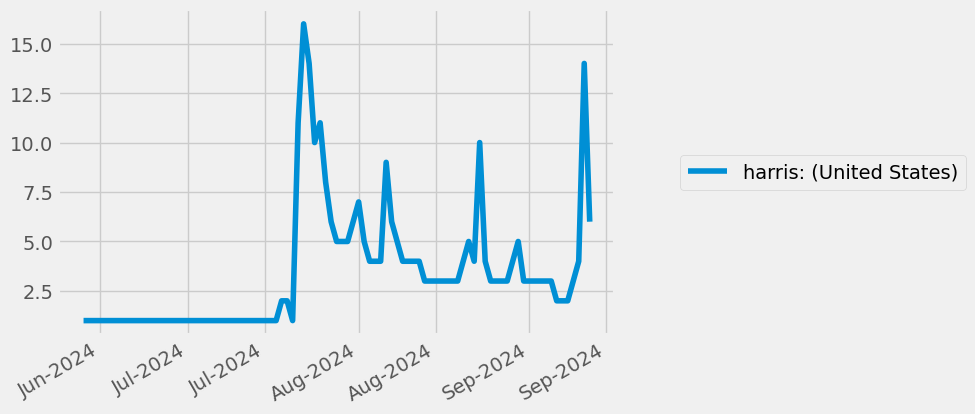

In [12]:
import EDS
# Use ptrend (short for plot trend) to plot this data.
# This function expects you to provide a table name, and the x and y column names
# Optionally, you can format the dates on the x-axis
# fmtdate="%b-%Y" tell it to use short-version month names (%b), hyphen, then year (%Y).
EDS.ptrend(debate,"Day","harris: (United States)",fmtdate="%b-%Y")

#### Can overlay by issuing multiple ptrend in same cell

92.0

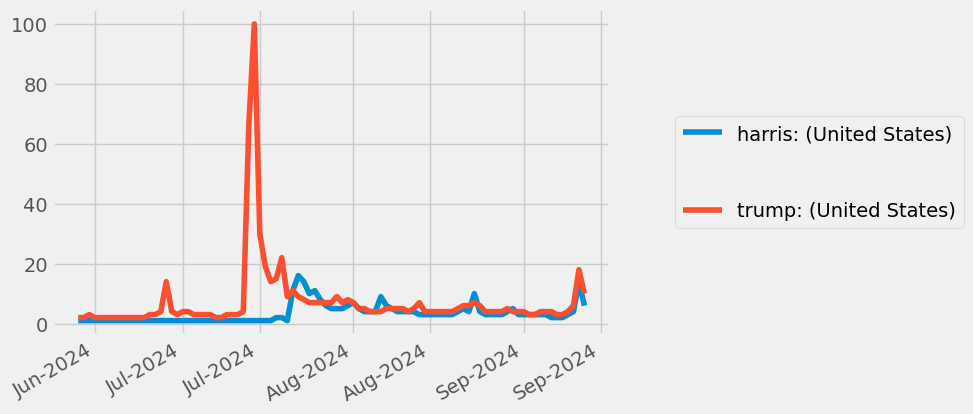

In [13]:
EDS.ptrend(debate,"Day","harris: (United States)",fmtdate="%b-%Y")
EDS.ptrend(debate,"Day","trump: (United States)",fmtdate="%b-%Y")

In [14]:
# Use the FilterTDate function from the EDS module.
# The function expects you to provide a table name along with the start and end dates.
# It will return a new table with only the rows in the date range you specified.
debate_JUL_SEP = EDS.FilterTdate(debate, '7/01/2024', '10/31/2024')

Filtering Table dates between 7/01/2024 10/31/2024


73.0

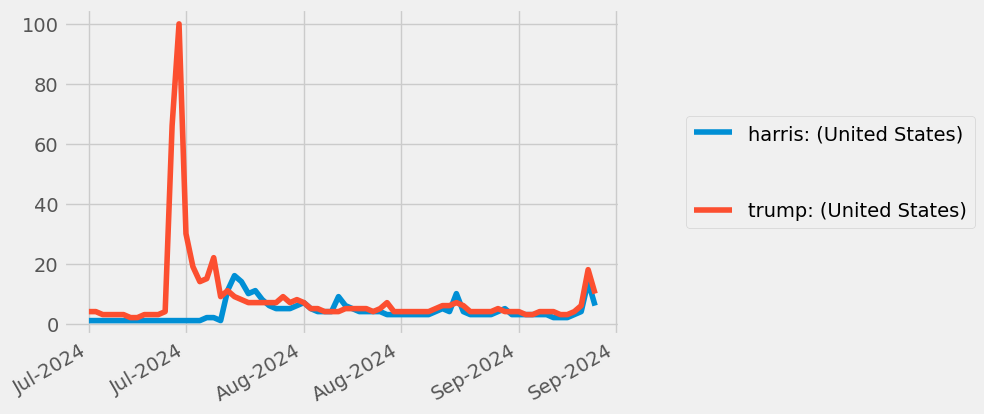

In [15]:
EDS.ptrend(debate_JUL_SEP,"Day","harris: (United States)",fmtdate="%b-%Y")
EDS.ptrend(debate_JUL_SEP,"Day","trump: (United States)",fmtdate="%b-%Y")

# More Data visualization

Need to import these module to plot

In [16]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Line Plots

In [17]:
from datascience import *
data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2020/national/asrh/nc-est2020-agesex-res.csv'
full_census_table = Table.read_table(data)
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2020')
partial_census_table = partial_census_table.relabeled('SEX', 'GENDER').relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2020', '2020')
partial_census_table

GENDER,AGE,2010,2020
0,0,3951495,3735010
0,1,3957904,3773884
0,2,4090799,3853025
0,3,4111869,3921526
0,4,4077511,4017847
0,5,4064653,4054336
0,6,4073031,4040169
0,7,4043100,4029753
0,8,4025624,4034785
0,9,4125413,4078668


In [18]:
census=partial_census_table.where(0,0).where('AGE',are.below(99))

Select proper columns

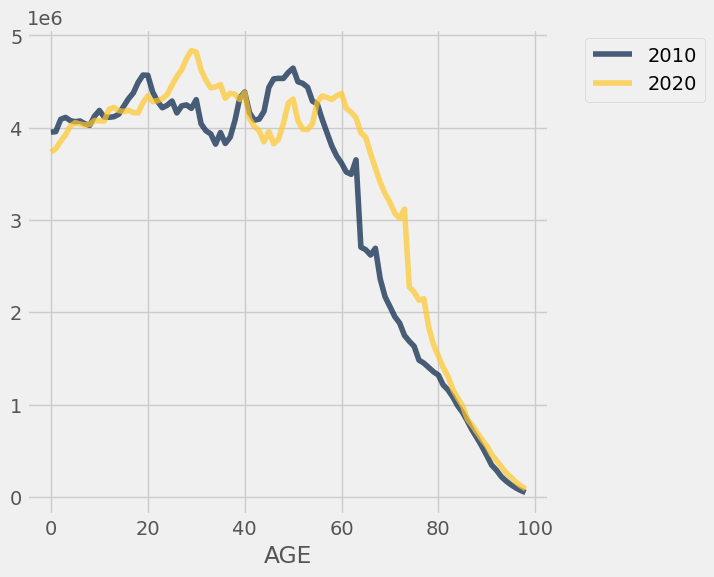

In [20]:
census.select('AGE','2010','2020').plot('AGE')

## Scatter Plots depicts relationship between two variables

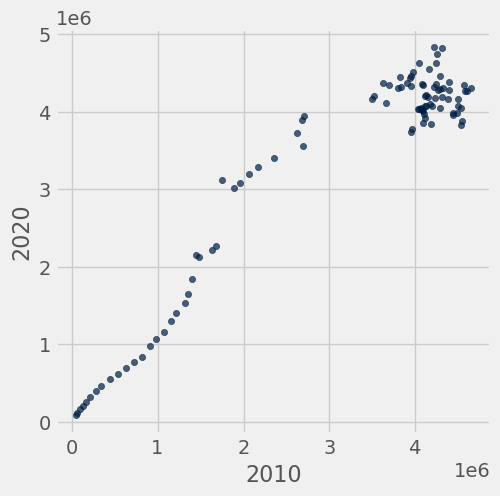

In [21]:
census.scatter('2010','2020')